# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module `ThermostattedDynamics`

In [1]:
include("../src/ThermostattedDynamics.jl")

ThermostattedDynamics

In [2]:
using ThermostattedDynamics

Let's import the parameters file

In [3]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And codify them in the predefined type Parameters

In [4]:
parameters = Parameters(T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters(1.0,0.1,0.0125,0.0025,10,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4))

You may change the parameters from here. For instance, let's change the integrator from a Runge Kutta RK4 with fixed stepsize to an adaptative RK45 (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [5]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

In [6]:
parameters.integrator = Integrator("RK45", ode45)

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

10

And let's compute the lyapunov exponents by calling the function `lyapunov_exponents`

In [8]:
lyap = lyapunov_exponents(parameters)

10×6 Array{Float64,2}:
 0.279108  -0.00641676   -0.273096   0.566901  -0.242165  -0.19345  
 0.246422  -0.011967     -0.238691   1.93052   -0.43623    0.0641517
 0.254483  -0.00734147   -0.245338  -1.32347    0.727331  -0.0285155
 0.231548  -0.000638579  -0.230169   0.117842   0.730452   0.163286 
 0.242836   0.00350512   -0.237922  -0.372491  -0.612825   0.219756 
 0.222815  -0.000178816  -0.223279   0.844885  -0.489054   0.141976 
 0.254924   8.98043e-5   -0.254089  -0.888629  -0.728862   0.0117144
 0.244299  -0.000768577  -0.243616   1.01296   -0.380259  -0.159001 
 0.243618   0.00157608   -0.244705   0.942694  -1.29214    0.0750369
 0.225145  -0.000987355  -0.22215    1.00125   -0.590897   0.100505 

The data is generated in the format

$$\lambda_1 \quad \lambda_2 \quad \lambda_3 \quad q_0 \quad p_0 \quad \zeta_0 \quad$$

Let's see what are the maximum and minimum of the first exponent

In [9]:
maximum(lyap[:,1]), minimum(lyap[:,1])

(0.27910806572255187,0.22281493481081124)

You may save the generated data with the function `save_lyapunov`. For that let's choose a filename

In [10]:
filename = "lyapunovdata"
save_lyapunov(filename, lyap, parameters)

The file `filename.hdf5` was saved in the folder `../data/`

Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations` by calling the function `trajectory`. The parameter `nsimulations` indicates how many parts of the trajectory are generated. Each part contains a segment of length `nsteps*dt`

In [7]:
trajec = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.


100001×4 Array{Float64,2}:
    0.0     -0.289919  -0.203029   0.355087 
    0.0125  -0.292311  -0.180212   0.343046 
    0.025   -0.294435  -0.160067   0.330907 
    0.0375  -0.296323  -0.142282   0.318692 
    0.05    -0.298001  -0.126581   0.306418 
    0.0625  -0.299495  -0.112722   0.294097 
    0.075   -0.300826  -0.100489   0.281738 
    0.0875  -0.302013  -0.0896931  0.269351 
    0.1     -0.303073  -0.0801661  0.256941 
    0.1125  -0.304022  -0.0717605  0.244513 
    0.125   -0.304871  -0.0643458  0.232071 
    0.1375  -0.305634  -0.0578066  0.219618 
    0.15    -0.30632   -0.0520416  0.207155 
    ⋮                                       
 1249.86    -1.32798    0.092571   0.232835 
 1249.88    -1.3267     0.11144    0.220466 
 1249.89    -1.3252     0.128717   0.208147 
 1249.9     -1.32349    0.144664   0.195881 
 1249.91    -1.32159    0.159525   0.183671 
 1249.92    -1.3195     0.173525   0.171518 
 1249.94    -1.31725    0.186878   0.159424 
 1249.95    -1.31483    0.19

The data is saved in the format 
    $$t \quad q \quad p \quad \zeta$$
You may plot it

In [8]:
using PyPlot

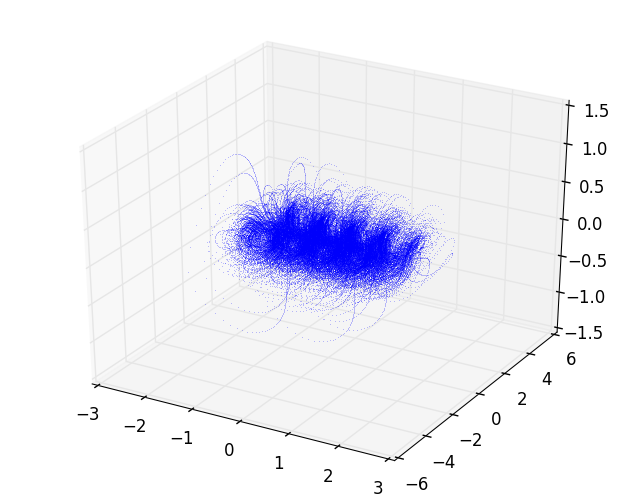

In [10]:
plot3D(trajec[:,2], trajec[:,3], trajec[:,4], ".", ms = 0.5, alpha = 0.3);

You may save the trajectory in an .hdf5 file with the command `save_trajectory`

In [12]:
filename = "trajecquart"
save_trajectory(filename, trajec, parameters)

## Poincaré sections

In [14]:
?sections

search: sections CompositeException InvalidStateException ProcessExitedException



This function computes the Poincare sections for the integrated trajectory saved in trajectorydata. It generates a .hdf5 file.

Example:

```
julia> sections("myfile", Potential("quartic", x -> x^4/4.), Thermostat("logistic", Q, z-> exp(z/Q)/(Q*( 1 +exp(z/Q))^2.)))
```


In [17]:
sections("trajYiHQE", potential, thermo)

File sectionsYiHQE.hdf5 succesfully generated. See file in ../data/


In [18]:
file = h5open("../data/sectionsYiHQE.hdf5")
zsection = read(file["zsection"])
psection = read(file["psection"])

579×4 Array{Float64,2}:
    0.268388  -2.06862   -4.69967e-13  -0.0307168 
    7.90386   -1.42793   -1.13677e-13  -0.0268507 
   14.3609    -1.04642   -3.78731e-13   0.2547    
   21.0731    -1.57494   -2.06451e-14  -0.0881655 
   28.1214    -1.52437   -5.91721e-13  -0.0952006 
   36.07      -2.19348   -4.6619e-13    0.0183963 
   44.1123    -1.54837   -3.86805e-14   0.127799  
   51.468     -1.70818   -4.51883e-13   0.283334  
   59.7782    -1.69004   -2.96491e-13  -0.149226  
   66.9871    -1.67037   -8.86312e-13   0.113329  
   74.1154    -1.16916   -4.38056e-13   0.0753693 
   80.273     -1.16811   -8.14321e-13  -0.169217  
   86.0376    -1.19996   -5.08525e-13   0.226996  
    ⋮                                             
 1800.35       0.927138   4.43902e-14   0.040212  
 1805.74       0.915959   3.38731e-13  -0.122111  
 1811.93       1.35964    9.3342e-13   -0.0453037 
 1818.59       1.51919    1.12821e-13   0.360235  
 1825.84       1.4715     1.0778e-14    0.0154624 
 1832.8

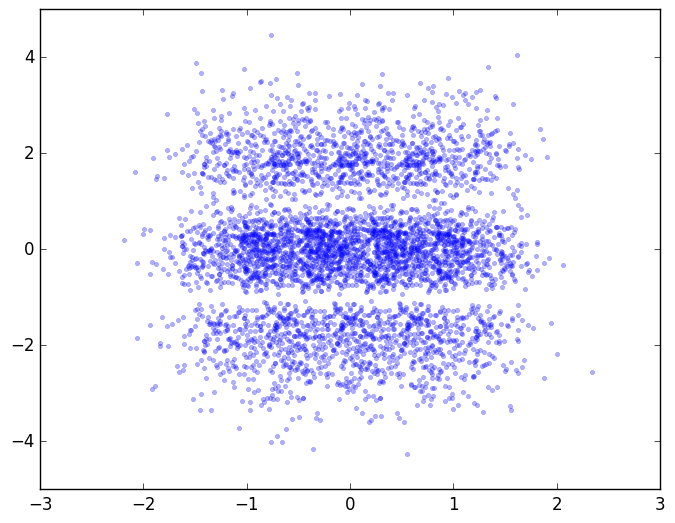

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f408cf6c4d0>

In [19]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

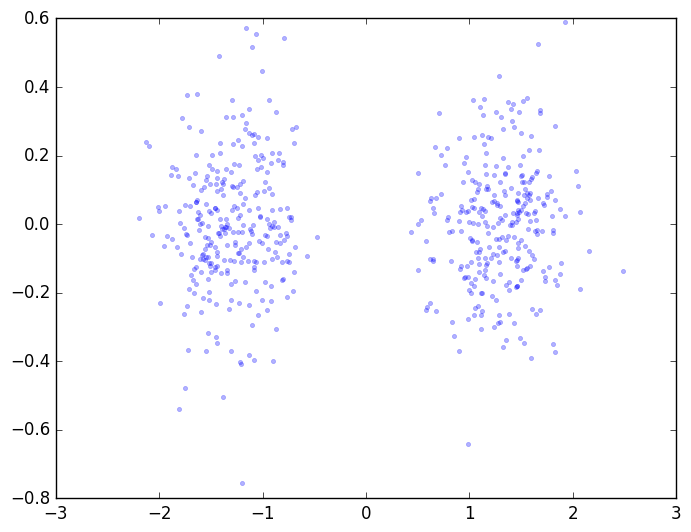

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f408ceabad0>

In [20]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

In [21]:
?marginaldistributions

search: marginaldistributions



This function generates an array saved as a plain text that contains the integrated trajectory together with each marginal theoretical distribution. The normalization factor associated with the distribution in `q` is passed as an argument.  Example:

```
julia> results = marginaldistributions(filename, Potential("quartic", x->x^4/4.), Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor)
```


The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [22]:
Z = 2.563693352
marginaldistributions("../data/trajYiHQE", potential, thermo, Z)

File histYiHQE succesfully generated. See file in ../data/


In [23]:
data_marg = readdlm("../data/histYiHQE")

15001×6 Array{Float64,2}:
 -1.77031   0.0334759   -1.53383    0.123039   -0.180427    1.21357 
 -1.97407   0.00875601  -1.36454    0.157249    0.027878    2.45205 
 -2.06714   0.00406149  -0.161284   0.393787   -0.0124875   2.49028 
 -2.01185   0.00649248   1.15009    0.205914   -0.0954426   2.00714 
 -1.79317   0.0294161    1.83857    0.0736      0.170212    1.30415 
 -1.62009   0.0696901    0.9976     0.242552    0.292599    0.482947
 -1.52274   0.101715     0.622085   0.328758    0.244863    0.732126
 -1.45399   0.12761      0.507399   0.350756    0.157813    1.41799 
 -1.38963   0.153555     0.547203   0.343471    0.0659674   2.24659 
 -1.30993   0.186833     0.761661   0.298495   -0.00773783  2.49626 
 -1.1918    0.23555      1.13639    0.209166   -0.0195787   2.47619 
 -1.03786   0.291852     1.22871    0.187532    0.0451813   2.37663 
 -0.902282  0.330502     0.928067   0.259346    0.0682389   2.23015 
  ⋮                                                         ⋮       
 -0.5199

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

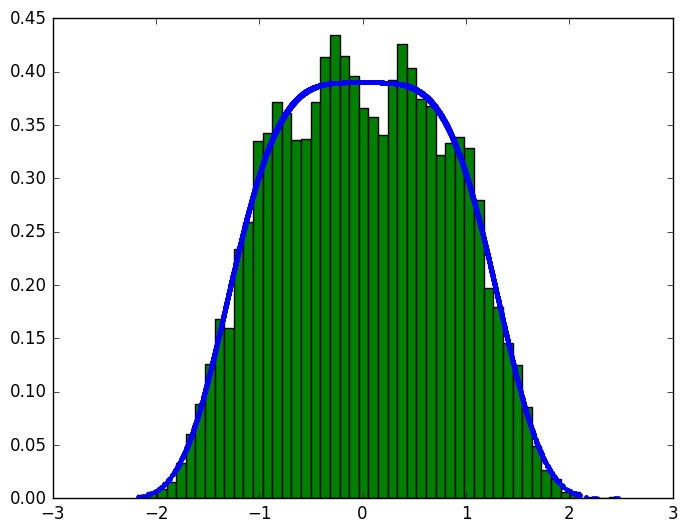

In [24]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [25]:
?hellingerdistance

search: hellingerdistance



This function returns a plain data text that contains the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(filename, Potential("quartic", x->x^4./4.),
Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor, n)
```


In [26]:
hellingerdistance("../data/trajYiHQE", potential, thermo, Z)

1
2
3
4
5
6
7
8
9
10
File hellingerYiHQE succesfully generated. See file in ../data/


In [27]:
data_hell = readdlm("../data/hellingerYiHQE")

10×3 Array{Float64,2}:
  186.25  0.0857247  0.000853634
  373.75  0.0636261  0.000633954
  561.25  0.0650688  0.000645852
  748.75  0.0558112  0.00055765 
  936.25  0.0489119  0.000484944
 1123.75  0.0453513  0.000453098
 1311.25  0.0414773  0.00041466 
 1498.75  0.0390975  0.000390076
 1686.25  0.0380517  0.000378732
 1873.75  0.0356461  0.000355982

The data is returned in the format $$time \quad hellinger \quad error $$

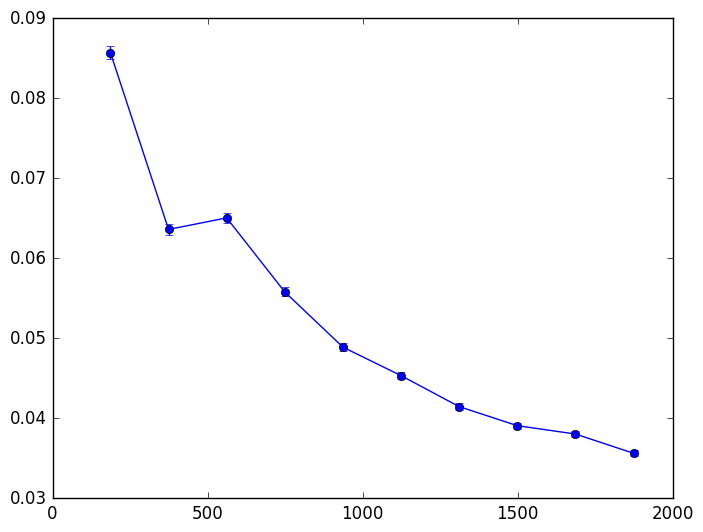

In [28]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [29]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##5#6}("Nose-Hoover",#5)

In [30]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##7#8}("Harmonic",#7)

In [31]:
trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Trajectory trajxXgKN.hdf5 succesfully generated. See file in ../data


In [32]:
sections("trajxXgKN", potential, thermo)

File sectionsxXgKN.hdf5 succesfully generated. See file in ../data/


In [33]:
file = h5open("../data/sectionsxXgKN.hdf5")
zsection = read(file["zsection"])
psection = read(file["psection"]);

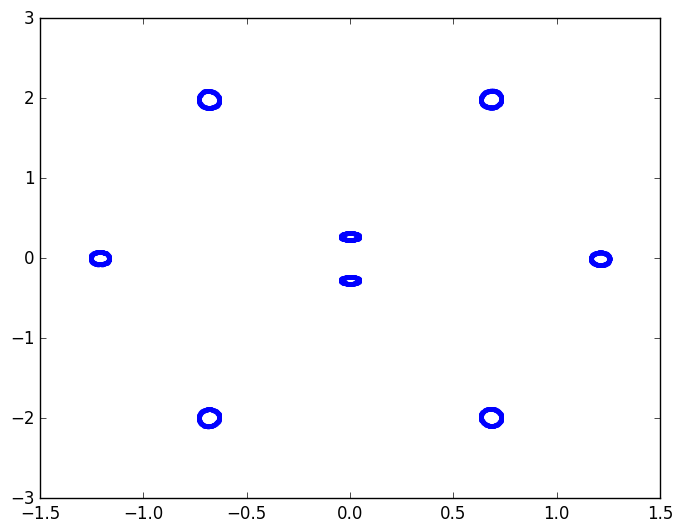

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f408cb894d0>

In [34]:
plot(zsection[:,2],zsection[:,3], ".", alpha = 0.3)